# lambda functions

In one of the later examples, I created a lambda function

A lambda function allows you to create and use a new short function without having to formally define it.

In [1]:
import re
states = ['   Alabama ', 'Georgia!', 'Georgia', 'georgia', 
          'FlOrIda', 'south  carolina##', 'West virginia?']

In [2]:
# I could define a function that replaces  two spaces with one space:
def replace_space(x):
    return(re.sub('  ', ' ', x))

In [3]:
# and then apply it to the strings:
list(map(replace_space, states))

['  Alabama ',
 'Georgia!',
 'Georgia',
 'georgia',
 'FlOrIda',
 'south carolina##',
 'West virginia?']

In [4]:
# however, because the code for the function is so short, it might be easier to just create
# a quick function without a formal name. These 'anonymous' functions are also known as lambda functions

list(map(lambda x: re.sub('  ',' ', x), states))

['  Alabama ',
 'Georgia!',
 'Georgia',
 'georgia',
 'FlOrIda',
 'south carolina##',
 'West virginia?']

In [36]:
list(map(lambda x: re.sub('[?#!]','', x.title().strip()), states))

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South  Carolina',
 'West Virginia']

In [37]:
"word1 word2 4word !word ,word =word".title()

'Word1 Word2 4Word !Word ,Word =Word'

In [5]:
list(map(lambda x: x.title(), states))

['   Alabama ',
 'Georgia!',
 'Georgia',
 'Georgia',
 'Florida',
 'South  Carolina##',
 'West Virginia?']

In [ ]:
list(map(lambda x: re.sub('[?#!]','', x.title().strip()) , states))

lambda functions are written in the form:

`lambda argument1, argument2, etc: expression to return`

In [6]:
# lambda functions can accept multiple arguments
# if you use it with map, you'll need to provide a list for each argument
list(map(lambda x, y: x + y, [1,2,3], [100,200,300]))

[101, 202, 303]

lambda functions are written in the form:

`lambda argument1, argument2, etc: expression to return`

In [7]:
# lambda functions can accept multiple arguments
# if you use it with map, you'll need to provide a list for each argument
list(map(lambda x, y: x + y, [1,2,3], [100,200,300]))

[101, 202, 303]

In [44]:
list(map(lambda x,y: x + y,(x for x in range(10)),(y for y in range(20,0,-2))))

[20, 19, 18, 17, 16, 15, 14, 13, 12, 11]

# Linear Algebra with NumPy

In [9]:
import numpy as np

In [27]:
x = np.array([[1,2,3],[5,2,2]])
print(x)

[[1 2 3]
 [5 2 2]]


In [28]:
y = np.arange(1,7).reshape(2,3)
print(y)

[[1 2 3]
 [4 5 6]]


In [29]:
x * y  # asterisk does elementwise multiplication (similar to R)

array([[ 1,  4,  9],
       [20, 10, 12]])

In [30]:
x @ y.T # @ sign does matrix multiplication, equivalent to R's %*%

array([[14, 32],
       [15, 42]])

In [31]:
x.T @ y

array([[21, 27, 33],
       [10, 14, 18],
       [11, 16, 21]])

In [35]:
np.dot(x, y.T)  # marix multiplication can also be done via np.dot()

array([[14, 32],
       [15, 42]])

In [ ]:
x @ x.T

## simple linear regression example

If we want to estimate the coefficients of a linear regression fit 

$$\hat{y} = \beta_0 + \beta_1 x$$

This can be achieved via linear algebra.

We present x as a matrix: one row for each observation, and a column of 1s to go with $\beta_0$ and the next column consists of values of x.

Y is a column matrix of values.

The coefficient estimates that minimize the sum of squares for linear regression is

$$\hat{\beta} = (x^Tx)^{-1} x^T y$$

In [49]:
x = np.array([[1,1,1,1],[1,2,3,4]]).T
y = np.array([2,6,4,8]).reshape(4,1)

In [50]:
x

array([[1, 1],
       [1, 2],
       [1, 3],
       [1, 4]])

In [51]:
y

array([[2],
       [6],
       [4],
       [8]])

In [53]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

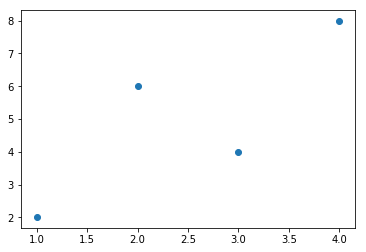

In [54]:
plt.scatter(x[:,1],y)
plt.show

The coefficient estimates that minimize the sum of squares for linear regression is

$$\hat{\beta} = (x^Tx)^{-1} x^T y$$

In [56]:
np.linalg.inv(x.T @ x) @ x.T @ y

array([[1. ],
       [1.6]])

(matches the results from R)

## other linear algebra functions

In [57]:
xtx = x.T @ x
print(xtx)

[[ 4 10]
 [10 30]]


In [58]:
np.linalg.inv(xtx)

array([[ 1.5, -0.5],
       [-0.5,  0.2]])

In [69]:
xtx @ np.linalg.inv(xtx)

array([[1., 0.],
       [0., 1.]])

In [59]:
a = np.linalg.cholesky(xtx)  # cholesky decomposition of a square matrix produces a lower triangular matrix
print(a)

[[2.         0.        ]
 [5.         2.23606798]]


In [60]:
a @ a.T  # recreate the original matrix

array([[ 4., 10.],
       [10., 30.]])

In [61]:
q,r = np.linalg.qr(xtx)  # qr decomposition

In [62]:
q # q is orthogonal, shown later

array([[-0.37139068, -0.92847669],
       [-0.92847669,  0.37139068]])

In [63]:
r # r is upper triangular

array([[-10.77032961, -31.56820749],
       [  0.        ,   1.85695338]])

In [64]:
q @ r  #q times r is the original matrix

array([[ 4., 10.],
       [10., 30.]])

In [65]:
q @ q.T  # q is orthogonal, so q times its transpose gives the identity matrix

array([[ 1.00000000e+00, -2.36019294e-17],
       [-2.36019294e-17,  1.00000000e+00]])

In [68]:
val, vec = np.linalg.eig(xtx)  # eigen vectors and eigen values of the matrix
print(val)
print(vec)

[ 0.59878053 33.40121947]
[[-0.94673755 -0.32200622]
 [ 0.32200622 -0.94673755]]


In [74]:
print(xtx @ vec[:,0])  # the matrix times its eigen vector produces a vector, that is XtX v
print(vec[:,0] * val[0])  # equivalent to the eigenvector multiplied by a scalar lambda v

[-0.56688802  0.19281106]
[-0.56688802  0.19281106]


In [73]:
print(xtx @ vec[:,1])
print(vec[:,1] * val[1])

[-10.75540041 -31.62218879]
[-10.75540041 -31.62218879]


# Pandas

NumPy creates ndarrays that must contain values that are of the same data type.

Pandas creates dataframes. Each column in a dataframe is an ndarray. This allows us to have traditional tables of data where each column can be a different data type.

In [75]:
import numpy as np
import pandas as pd

The basic data structure in pandas is the *series*. You can construct it in a similar fashion to making a numpy array.

The command to make a Series object is

`pd.Series(data, index=index)`

the `index` argument is optional

In [76]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print(data)
print(type(data))

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64
<class 'pandas.core.series.Series'>


In [80]:
data2 = pd.Series([x/4 for x in range(13)], index = range(13))
print(data2)

0     0.00
1     0.25
2     0.50
3     0.75
4     1.00
5     1.25
6     1.50
7     1.75
8     2.00
9     2.25
10    2.50
11    2.75
12    3.00
dtype: float64


The series is printed out in a table form.

The type is a Pandas Series

In [81]:
print(data.values)
print(type(data.values))

[0.25 0.5  0.75 1.  ]
<class 'numpy.ndarray'>


The values attribute of the series is a numpy array.

In [ ]:
print(data.index)
print(type(data.index))  # the row names are known as the index

You can subset a pandas series like other python objects

In [ ]:
print(data[1])
print(type(data[1]))  # when you select only one value, it simplifies the object

In [ ]:
print(data[1:3])
print(type(data[1:3]))  # selecting multiple values returns a series

In [ ]:
print(data[np.array([1,0,2])])  # fancy indexing using a numpy array

In [ ]:
# specifying the index values
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
print(data)

In [ ]:
data[1]  # subset with index position

In [ ]:
data["a"]  # subset with index names

In [ ]:
data["a":"c"] # using names includes the last value

In [ ]:
data[0:2]  # slicing behavior is unchanged

In [ ]:
# creating a series from a python dictionary
# remember, dictionary construction uses curly braces {}
samp_dict = {'Archie': 71,
             'Betty': 66,
             'Veronica': 62,
             'Jughead': 72,
             'Cheryl': 66}
samp_series = pd.Series(samp_dict)
samp_series # the series gets alphabetized by its index

In [ ]:
print(samp_series.index)

In [ ]:
print(type(samp_dict))
print(type(samp_series))

In [ ]:
actor_dict = {'Archie': "KJ",
              'Jughead': "Cole",
              'Betty': "Lili",
              'Veronica': "Camila",
              'Cheryl': "Madelaine"}  # note that the dictionary order is not same here
actor = pd.Series(actor_dict)  # still get alphabetized by index
print(actor)

# Creating a DataFrame

In [ ]:
# we create a dataframe by providing a dictionary of series objects
riverdale = pd.DataFrame({'height': samp_series,
                       'actor': actor})  

print(riverdale)

In [ ]:
print(type(riverdale))  # this is a DataFrame object

In [ ]:
data = [{'a': 0, 'b': 0}, {'a': 1, 'b': 2}, {'a': 2, 'b': 5}]  # data is a list of dictionaries
data

In [ ]:
print(pd.DataFrame(data, index = [1,2,3]))

In [ ]:
data = [{'a': 0, 'b': 0}, {'a': 1, 'b': 2}, {'a': 2, 'c': 5}]  # data is a list of dictionaries
data

In [ ]:
print(pd.DataFrame(data))

In [ ]:
data = [{'a': 0, 'b': 0}, {'a': 1, 'b': 2}, {'a': 2, 'c': "5"}]  # data is a list of dictionaries
data

In [ ]:
print(pd.DataFrame(data))

In [ ]:
data = np.random.randint(10, size = 10).reshape([5,2])
print(data)

In [ ]:
print(pd.DataFrame(data, columns = ["x","y"], index = ['a','b','c','d','e']))

# Subsetting the DataFrame

In [ ]:
print(riverdale)

In [ ]:
print(riverdale.keys())

In [ ]:
riverdale['actor']  # extracting the column

In [ ]:
riverdale.actor

In [ ]:
riverdale.actor[1]

In [ ]:
riverdale.actor['Jughead']

In [ ]:
print(riverdale.T)  # prints a copy of the transpose

In [ ]:
print(riverdale.loc['Jughead']) # subset based on location to get a row
print(type(riverdale.loc['Jughead']))
print(type(riverdale.loc['Jughead'].values))  # the values are of mixed type but is still a numpy array. 
# this is possible because it is a structured numpy array. (covered in "Python for Data Science" chapter 2)

In [ ]:
print(riverdale.loc[:,'height']) # subset based on location to get a column
print(type(riverdale.loc[:,'height']))  #the object is a pandas series
print(type(riverdale.loc[:,'height'].values))

In [ ]:
riverdale.loc['Archie','height']  # you can provide a pair of 'coordinates' to get a particular value

In [ ]:
riverdale.iloc[3,] # subset based on index location

In [ ]:
riverdale.iloc[0, 1] # pair of coordinates